In [21]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_visible = 4
num_hidden = 2 

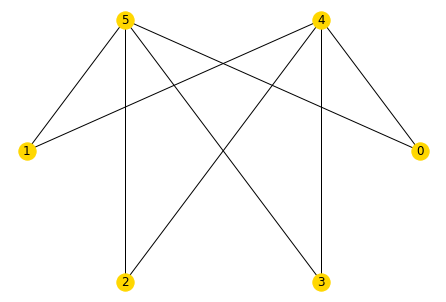

In [3]:
visible = [i for i in range(num_visible)]
hidden = [num_visible + j for j in range(num_hidden)]
edges = [(i, j) for i in visible for j in hidden]

G = nx.Graph()
G.add_edges_from(edges)
nx.draw_circular(G, with_labels=True, node_color='gold')

In [8]:
from active_coresets.pamc_qbm import PAMC_QBM

2022-03-07 14:30:26.476195: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 14:30:26.476213: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [36]:
import importlib
import active_coresets
importlib.reload(active_coresets.qmc_tim_qbm)
importlib.reload(active_coresets.pamc_qbm)
from active_coresets.pamc_qbm import PAMC_QBM

In [37]:
data_size = 100
data = -2 * np.random.randint(0, 2, size=(100, num_visible)) + np.ones((100, num_visible))

In [44]:
pamc_qbm = PAMC_QBM(visible, hidden, gamma=2, population_size=512)
pop_history = pamc_qbm.train(data.astype(np.float32), epochs=3, batch_size=10, betas=np.linspace(0,1,5).astype(np.float32), num_its=10)

Epoch 1
...Batch 1 / 10
...Batch 2 / 10
...Batch 3 / 10
...Batch 4 / 10
...Batch 5 / 10
...Batch 6 / 10
...Batch 7 / 10
...Batch 8 / 10
...Batch 9 / 10
...Batch 10 / 10
Epoch 2
...Batch 1 / 10
...Batch 2 / 10
...Batch 3 / 10
...Batch 4 / 10
...Batch 5 / 10
...Batch 6 / 10
...Batch 7 / 10
...Batch 8 / 10
...Batch 9 / 10
...Batch 10 / 10
Epoch 3
...Batch 1 / 10
...Batch 2 / 10
...Batch 3 / 10
...Batch 4 / 10
...Batch 5 / 10
...Batch 6 / 10
...Batch 7 / 10
...Batch 8 / 10
...Batch 9 / 10
...Batch 10 / 10


In [83]:
from matplotlib.animation import FuncAnimation
%matplotlib ipympl

In [65]:
def data_to_dict(data):
    dict = {}
    for z_pt in data:
        bitstring = ''.join(['0' if b == 1 else '1' for b in z_pt])
        pt = int(bitstring, 2)
        if pt in dict:
            dict[pt] += 1
        else:
            dict[pt] = 1
    return {k: v / sum(dict.values()) for k, v in dict.items()}

In [58]:
def y_range(dict, x_range):
    y = []
    for x in x_range:
        if x in dict:
            y.append(dict[x])
        else:
            y.append(0)
    return y

In [99]:
for rect, y in zip(m_bars, y_range(pop_history[0][:, :len(visible)], x_range)):
    rect.set_height(y)

In [ ]:
fig, ax = plt.subplots(figsize=[15,5])

x_range = range(2 ** len(visible))
data_dist = data_to_dict(data)
init_model_dist = data_to_dict(pop_history[0][:, :len(visible)])
width = 0.4

m_bars = ax.bar(x_range, y_range(init_model_dist, x_range), color='palegreen', label=r'$P^{model}_v$', align='edge', width=width)
d_bars = ax.bar(x_range, y_range(data_dist, x_range), color='lightsalmon', label=r'$P^{data}_v$', align='edge', width=-width)

plt.grid(alpha=.4, linestyle='--')
plt.legend(fontsize=14)
plt.xlabel(r'Visible state', fontsize=14)
plt.ylabel('Probability', fontsize=14)

def update(frame):
    model_population = pop_history[frame]
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
        rect.set_height(y)

anim = FuncAnimation(fig, update, frames=np.array(range(len(pop_history))))
plt.show()

0


/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
TypeError: only size-1 arrays can be converted to Python scalars

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backends/backend_qt5.py", line 475, in _draw_idle
    self.draw()
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 406, in draw
    self.figure.draw(self.renderer)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    resul

0
1


TypeError: only size-1 arrays can be converted to Python scalars

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backends/backend_qt5.py", line 475, in _draw_idle
    self.draw()
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 406, in draw
    self.figure.draw(self.renderer)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/artist.py", line 74, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/artist.py", line 51, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/figure.py", line 2781, in draw
    renderer, self, artists, self.suppressComposite)
  File "/home/jviszlai/Envs/coresets/lib/

2
3


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

4
5


  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykernel_212606/3635383174.py", line 4, in

6
7


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

8
9


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

10
11


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

12
13


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

14
15


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

16
17


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

18
19


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

20
21


  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykernel_212606/3635383174.py", line 4, in

22
23


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

24
25


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

26
27


Traceback (most recent call last):
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 1216, in _on_timer
    ret = func(*args, **kwargs)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1477, in _step
    still_going = super()._step(*args)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1189, in _step
    self._draw_next_frame(framedata, self._blit)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1208, in _draw_next_frame
    self._draw_frame(framedata)
  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/matplotlib/animation.py", line 1776, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "/tmp/ipykernel_212606/4098761645.py", line 19, in update
    for rect, y in zip(m_bars, y_range(model_population[:, :len(visible)], x_range)):
  File "/tmp/ipykerne

28


  File "/home/jviszlai/Envs/coresets/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1060, in __bool__
    return bool(self._numpy())
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
